<a href="https://colab.research.google.com/github/Vikernes27666/Analysis_Top1kMovies_IMDB/blob/main/Analysis_Top1kMovies_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Películas y Series de TV en **IMDB**
####El objetivo de este proyecto es realizar un análisis exploratorio de datos y modelado matemático para entender la relación entre diferentes características de películas y series de TV, como la calificación en IMDB, la recaudación bruta y el número de votos.

##Importar las bibliotecas necesarias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##1. Carga y limpieza de datos
####Importaremos el DataFrame y lo analizaremos en busca de posibles errores, además de buscar y obtener más información detallada.

In [ ]:
#Cargar datos
datos = pd.read_csv('/content/imdb_top_1000.csv')
datos.shape

(1000, 16)

In [ ]:
# Mostramos los primeros registros
datos.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
# Verificamos el contenido y tipos de datos del DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


###1.1. Limpieza básica de datos
####Utilizamos pandas para realizar la limpieza básica de datos (manejo de valores nulos, tipos de datos).

In [ ]:
# 1. Manejar valores nulos específicos en el DataFrame
datos['Certificate'].fillna('Unknown', inplace=True)
datos['Meta_score'].fillna(datos['Meta_score'].mean(), inplace=True)
datos['Gross'].fillna('0', inplace=True)

# 2. Eliminar duplicados
datos.drop_duplicates(inplace=True)

# 3. Convertir 'Released_Year' a entero
datos['Released_Year'] = pd.to_numeric(datos['Released_Year'], errors='coerce').fillna(-1).astype(int)

# 4. Convertir 'Gross'a float (eliminando comas)
datos['Gross'] = datos['Gross'].astype(str).str.replace(',', '').astype(float)

# Mostramos
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.1+ KB
None


##2. Análisis exploratorio de datos (EDA)

###2.1. Calculamos estadísticas descriptivas básicas.

In [ ]:
datos.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,1989.225000,7.949300,77.97153,2.736929e+05,5.653688e+07
std,67.165002,0.275491,11.36206,3.273727e+05,1.032382e+08
min,-1.000000,7.600000,28.00000,2.508800e+04,0.000000e+00
25%,1976.000000,7.700000,72.00000,5.552625e+04,4.457098e+05
50%,1999.000000,7.900000,77.97153,1.385485e+05,1.070275e+07
75%,2009.000000,8.100000,85.25000,3.741612e+05,6.153989e+07
max,2020.000000,9.300000,100.00000,2.343110e+06,9.366622e+08


from matplotlib import pyplot as plt
_df_12['Released_Year'].plot(kind='hist', bins=20, title='Released_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['IMDB_Rating'].plot(kind='hist', bins=20, title='IMDB_Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Meta_score'].plot(kind='hist', bins=20, title='Meta_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['No_of_Votes'].plot(kind='hist', bins=20, title='No_of_Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Released_Year', y='IMDB_Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='IMDB_Rating', y='Meta_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Meta_score', y='No_of_Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='No_of_Votes', y='Gross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Released_Year'].plot(kind='line', figsize=(8, 4), title='Released_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['IMDB_Rating'].plot(kind='line', figsize=(8, 4), title='IMDB_Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Meta_score'].plot(kind='line', figsize=(8, 4), title='Meta_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['No_of_Votes'].plot(kind='line', figsize=(8, 4), title='No_of_Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

###2.2.  Generamos gráficos con matplotlib.

####2.2.1. Análisis de la recaudación bruta de una película vs. directores.





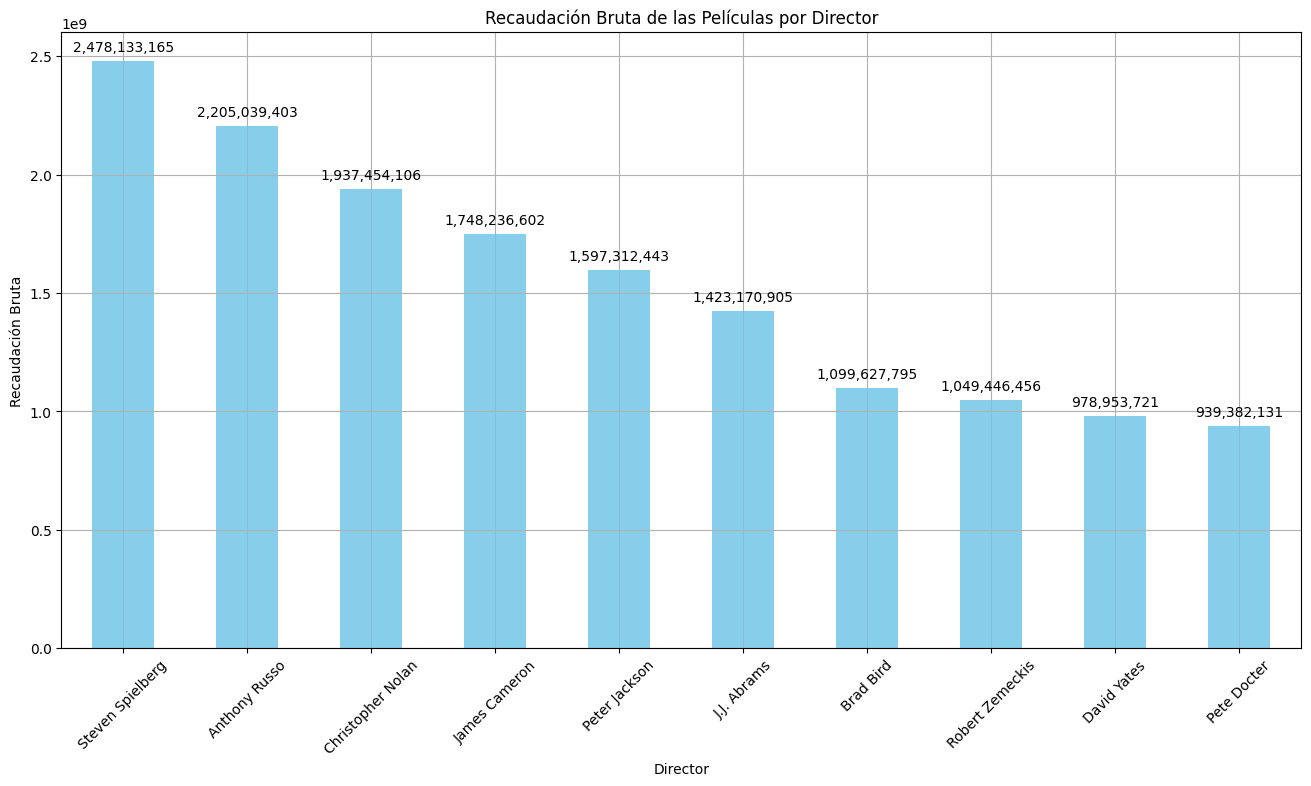

In [ ]:
# Convertir la columna 'Gross' a numérica
datos['Recaudacion'] = pd.to_numeric(datos['Gross'], errors='coerce')

# Agrupar por director y sumar la recaudación bruta
recaudacion_por_director = datos.groupby('Director')['Recaudacion'].sum().sort_values(ascending=False)

# Seleccionar los 10 directores con mayor recaudación bruta
top_10_directores = recaudacion_por_director.head(10)

# Crear la gráfica
plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura
ax = top_10_directores.plot(kind='bar', color='skyblue')
plt.title('Recaudación Bruta de las Películas por Director')
plt.xlabel('Director')
plt.ylabel('Recaudación Bruta')
plt.xticks(rotation=45)
plt.grid(True)

# Añadir etiquetas con la recaudación bruta en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formato con comas
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.show()


####2.2.2 Análisis de la recaudación bruta de una película vs. diferentes actores.

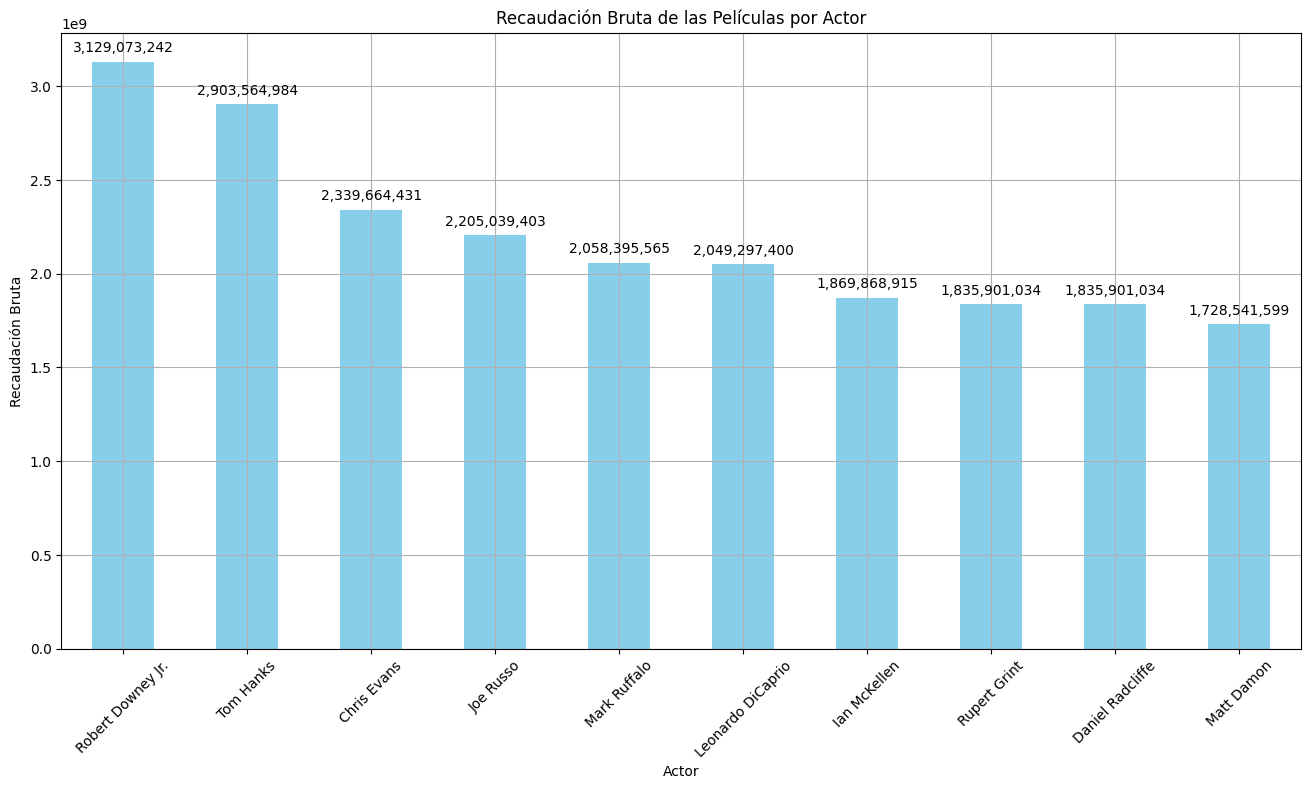

In [ ]:
# Convertir la columna 'Gross' a numérica
datos['Recaudacion'] = pd.to_numeric(datos['Gross'], errors='coerce')

# Crear un DataFrame para cada actor con su recaudación bruta
actores = ['Star1', 'Star2', 'Star3', 'Star4']
recaudacion_por_actor = pd.DataFrame()

for actor in actores:
    recaudacion_actor = datos.groupby(actor)['Recaudacion'].sum().reset_index()
    recaudacion_actor.columns = ['Actor', 'Recaudacion']
    recaudacion_por_actor = pd.concat([recaudacion_por_actor, recaudacion_actor])

# Agrupar por actor y sumar la recaudación bruta
recaudacion_por_actor = recaudacion_por_actor.groupby('Actor')['Recaudacion'].sum().sort_values(ascending=False)

# Seleccionar los 10 actores con mayor recaudación bruta
top_10_actores = recaudacion_por_actor.head(10)

# Crear la gráfica
plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura
ax = top_10_actores.plot(kind='bar', color='skyblue')
plt.title('Recaudación Bruta de las Películas por Actor')
plt.xlabel('Actor')
plt.ylabel('Recaudación Bruta')
plt.xticks(rotation=45)
plt.grid(True)

# Añadir etiquetas con la recaudación bruta en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formato con comas
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.show()

####2.2.3. Análisis del número de votos de una película vs. directores.

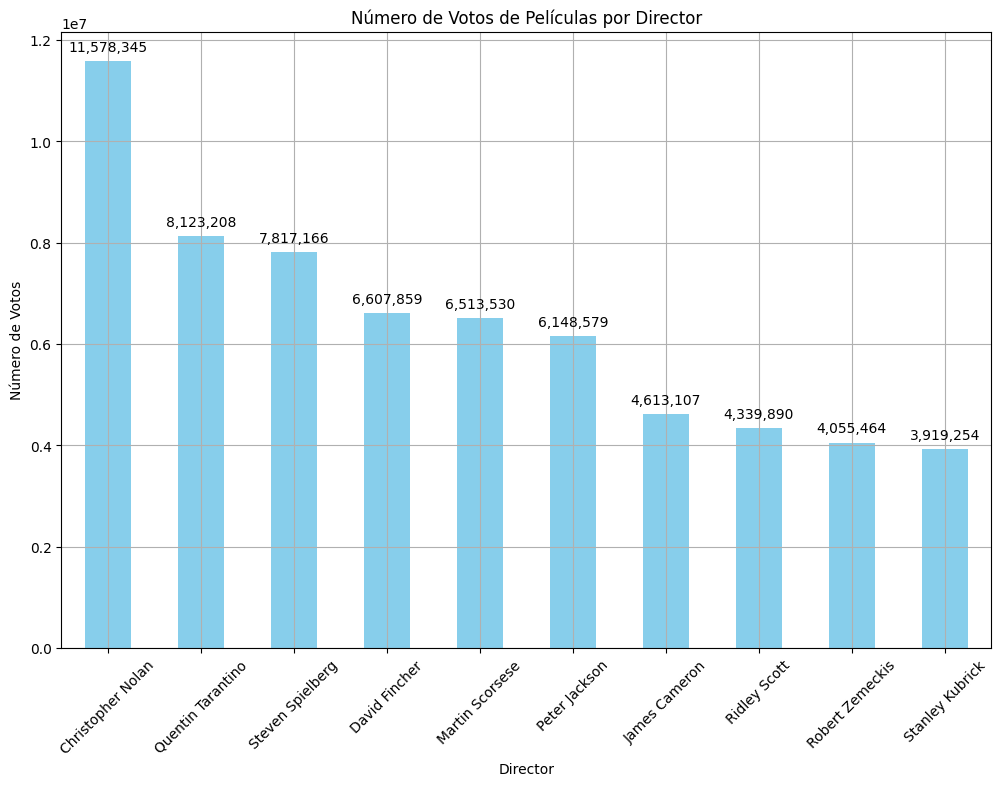

In [ ]:
# Agrupar por director y sumar el número total de votos
votos_por_director = datos.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False)

# Seleccionar los 10 directores con más votos
top_10_directores = votos_por_director.head(10)

# Crear la gráfica
plt.figure(figsize=(12, 8))
ax = top_10_directores.plot(kind='bar', color='skyblue')
plt.title('Número de Votos de Películas por Director')
plt.xlabel('Director')
plt.ylabel('Número de Votos')
plt.xticks(rotation=45)
plt.grid(True)

# Añadir etiquetas con el número de votos en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.show()


####2.2.4. Análisis del número de votos de una película vs. diferentes actores.


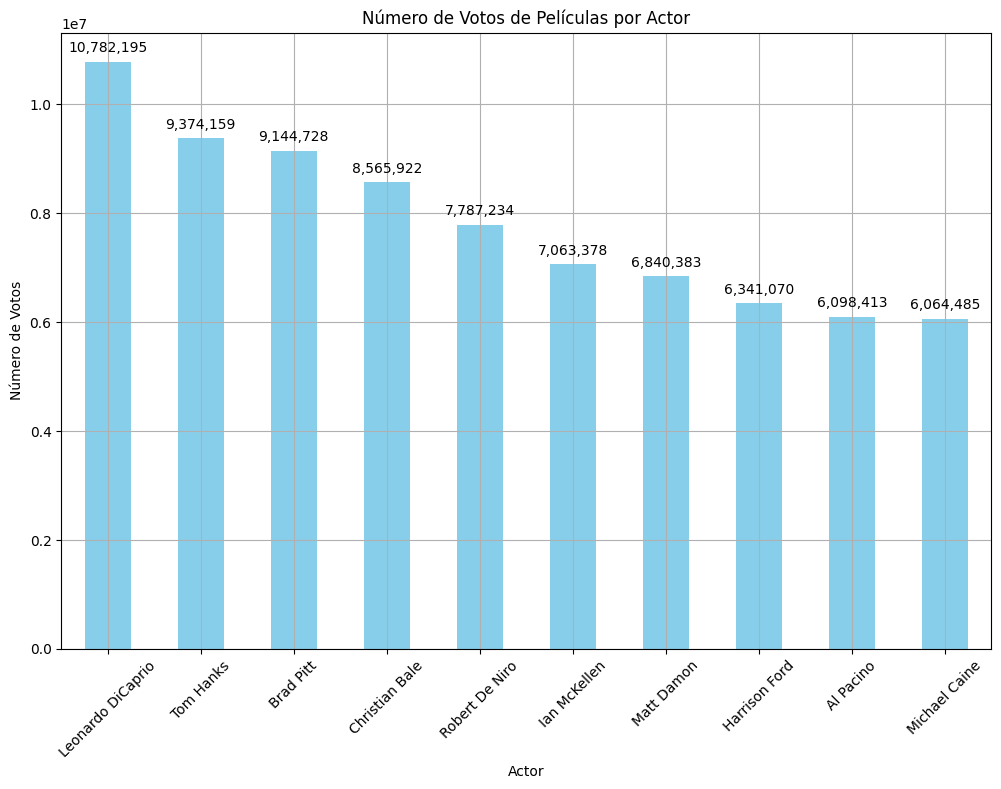

In [ ]:
# Crear un DataFrame para cada actor con su número total de votos
actores = ['Star1', 'Star2', 'Star3', 'Star4']
votos_por_actor = pd.DataFrame()

for actor in actores:
    votos_actor = datos.groupby(actor)['No_of_Votes'].sum().reset_index()
    votos_actor.columns = ['Actor', 'Total_Votos']
    votos_por_actor = pd.concat([votos_por_actor, votos_actor])

# Agrupar por actor y sumar el número total de votos
votos_por_actor = votos_por_actor.groupby('Actor')['Total_Votos'].sum().sort_values(ascending=False)

# Seleccionar los 10 actores con más votos
top_10_actores = votos_por_actor.head(10)

# Crear la gráfica
plt.figure(figsize=(12, 8))
ax = top_10_actores.plot(kind='bar', color='skyblue')
plt.title('Número de Votos de Películas por Actor')
plt.xlabel('Actor')
plt.ylabel('Número de Votos')
plt.xticks(rotation=45)
plt.grid(True)

# Añadir etiquetas con el número de votos en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.show()

####2.2.5 Analizar la preferencia de actores por diferentes géneros cinematográficos

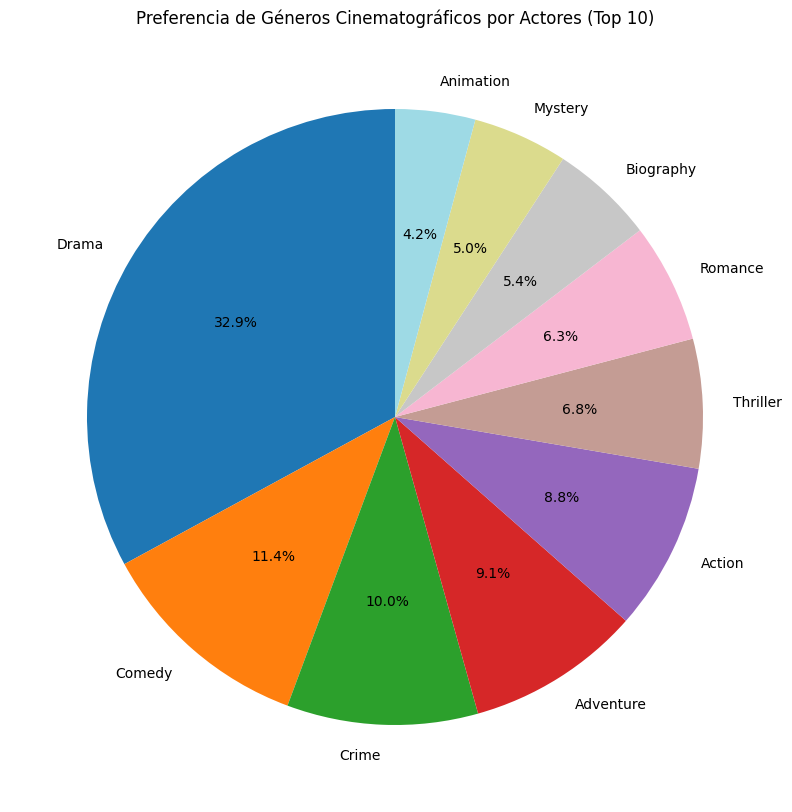

In [ ]:
# Descomponer la columna de géneros
datos['Genero'] = datos['Genre'].str.split(', ')

# Crear un DataFrame para cada actor con su género
actores = ['Star1', 'Star2', 'Star3', 'Star4']
genero_por_actor = pd.DataFrame()

for actor in actores:
    temp_df = datos.explode('Genero')
    genero_actor = temp_df.groupby(['Genero', actor]).size().reset_index(name='Cuenta')
    genero_por_actor = pd.concat([genero_por_actor, genero_actor])

# Contar la cantidad de actores únicos en cada género
actores_por_genero = genero_por_actor.groupby('Genero')[actores].nunique().sum(axis=1).sort_values(ascending=False)

# Seleccionar los 10 géneros más interesantes para los actores
top_10_generos = actores_por_genero.head(10)

# Crear el gráfico de pastel
plt.figure(figsize=(10, 10))
top_10_generos.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20', legend=False)
plt.title('Preferencia de Géneros Cinematográficos por Actores (Top 10)')
plt.ylabel('')

plt.show()

####2.2.6. Identificar combinaciones de actores que tienden a recibir buenas calificaciones en IMDB.

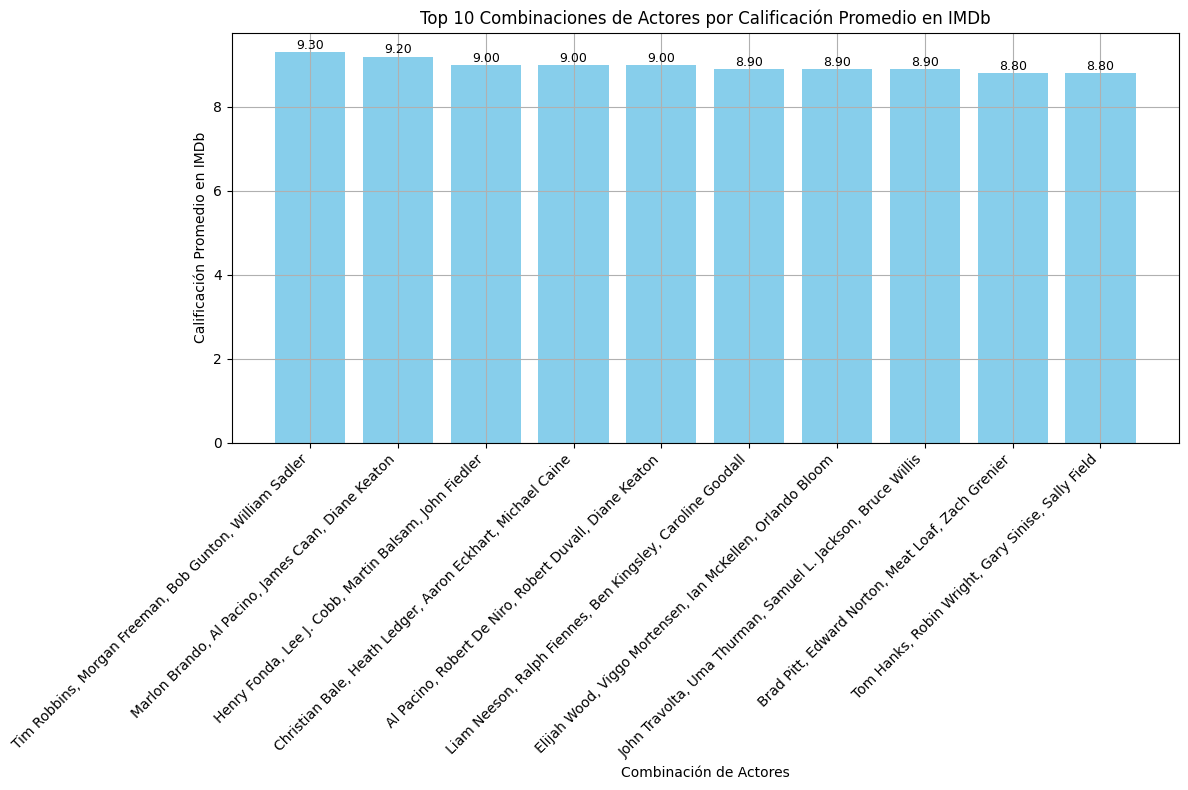

In [ ]:
# Calcular la calificación promedio de IMDb para cada combinación de actores
datos['Promedio_IMDB'] = datos[['IMDB_Rating']].mean(axis=1)

# Seleccionar las columnas relevantes para el análisis de combinaciones de actores
actores_columns = ['Star1', 'Star2', 'Star3', 'Star4']

# Crear una columna con las combinaciones de actores para cada película
datos['Combinacion_Actores'] = datos[actores_columns].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Agrupar por combinación de actores y calcular la calificación promedio de IMDb
promedio_por_combinacion = datos.groupby('Combinacion_Actores')['Promedio_IMDB'].mean().sort_values(ascending=False).head(10)

# Preparar datos para el gráfico de barras
combinaciones = promedio_por_combinacion.index
calificaciones = promedio_por_combinacion.values

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
plt.bar(combinaciones, calificaciones, color='skyblue')
plt.title('Top 10 Combinaciones de Actores por Calificación Promedio en IMDb')
plt.xlabel('Combinación de Actores')
plt.ylabel('Calificación Promedio en IMDb')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Añadir etiquetas con la calificación promedio en cada barra
for i, v in enumerate(calificaciones):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

####2.2.7. Identificar combinaciones de actores que tienden a generar mayores ingresos en taquilla.

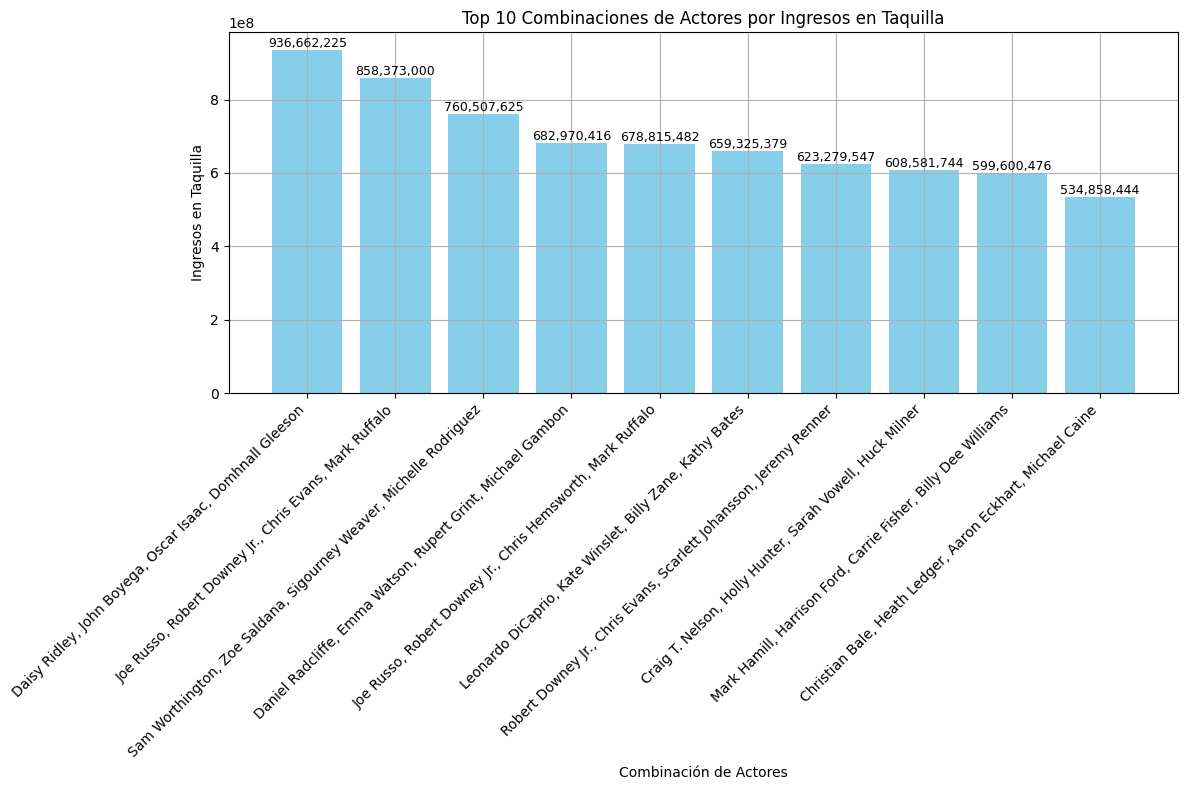

In [ ]:
# Convertir la columna 'Gross' a numérica si aún no lo está
datos['Gross'] = pd.to_numeric(datos['Gross'], errors='coerce')

# Seleccionar las columnas relevantes para las combinaciones de actores
actores_columns = ['Star1', 'Star2', 'Star3', 'Star4']

# Crear una columna con las combinaciones de actores para cada película
datos['Combinacion_Actores'] = datos[actores_columns].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Agrupar por combinación de actores y calcular los ingresos totales en taquilla
ingresos_por_combinacion = datos.groupby('Combinacion_Actores')['Gross'].sum().sort_values(ascending=False).head(10)

# Preparar datos para el gráfico de barras
combinaciones = ingresos_por_combinacion.index
ingresos = ingresos_por_combinacion.values

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
plt.bar(combinaciones, ingresos, color='skyblue')
plt.title('Top 10 Combinaciones de Actores por Ingresos en Taquilla')
plt.xlabel('Combinación de Actores')
plt.ylabel('Ingresos en Taquilla')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Añadir etiquetas con los ingresos en taquilla en cada barra
for i, v in enumerate(ingresos):
    plt.text(i, v + 0.01, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

##3.Modelado matemático:

*   Aplicamos álgebra lineal para encontrar la relación lineal entre las (regresión lineal simple).
*   Implementamos el modelo de regresión lineal desde cero usando Numpy.
*   Calcular la derivada de la función de costo y realizar un descenso de gradiente simple para ajustar los parámetros del modelo.







##Utilizaremos la columna Gross para ver la relación entre los ingresos brutos de una película y su calificación en IMDb (IMDB_Rating).

In [ ]:
# Seleccionar las columnas relevantes
datos = datos[['Gross', 'IMDB_Rating']]

# Filtrar los datos para eliminar valores faltantes o inválidos
datos = datos.dropna(subset=['Gross', 'IMDB_Rating'])

# Extraer las características y la variable objetivo
X = datos['Gross'].values
Y = datos['IMDB_Rating'].values

# Normalizar las características
X = (X - np.mean(X)) / np.std(X)

# Normalizar la variable objetivo
Y = (Y - np.mean(Y)) / np.std(Y)

# Inicializar los parámetros
W = 0
b = 0

### Función de Costo
Implementamos la función de costo (MSE).

$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 $

In [ ]:
# Definir la función de costo
def calcular_costo(X, Y, W, b):
    m = len(Y)
    costo = np.sum((W * X + b - Y) ** 2) / (2 * m)
    return costo

### Descenso de Gradiente
Implementamos el algoritmo de descenso de gradiente.

In [ ]:
# Implementar el algoritmo de descenso de gradiente
def descenso_gradiente(X, Y, W, b, tasa_aprendizaje, iteraciones):
    m = len(Y)
    for i in range(iteraciones):
        # Calcular las predicciones (hipótesis)
        Y_predicho = W * X + b

        # Calcular las derivadas
        dW = -1/m * np.sum(X * (Y - Y_predicho))
        db = -1/m * np.sum(Y - Y_predicho)

        # Actualizar los parámetros
        W = W - tasa_aprendizaje * dW
        b = b - tasa_aprendizaje * db

        # Calcular el costo
        costo = calcular_costo(X, Y, W, b)

        # Imprimir el costo cada 100 iteraciones
        if i % 100 == 0:
            print(f"Iteración {i}: Costo {costo}")

    return W, b

### Entrenamiento del Modelo
Entrenamos el modelo utilizando los datos de IMDB.

In [ ]:
# Verificar si hay valores nulos o infinitos en X o Y
print("Valores nulos en X:", np.isnan(X).sum())
print("Valores infinitos en X:", np.isinf(X).sum())
print("Valores nulos en Y:", np.isnan(Y).sum())
print("Valores infinitos en Y:", np.isinf(Y).sum())

Valores nulos en X: 0
Valores infinitos en X: 0
Valores nulos en Y: 0
Valores infinitos en Y: 0


Iteración 0: Costo 0.4999932167220099
Iteración 100: Costo 0.49937906148299593
Iteración 200: Costo 0.49887628401545897
Iteración 300: Costo 0.49846468583017156
Iteración 400: Costo 0.49812773145757044
Iteración 500: Costo 0.4978518841548529
Iteración 600: Costo 0.49762606208336824
Iteración 700: Costo 0.49744119310887697
Iteración 800: Costo 0.49728985033930273
Iteración 900: Costo 0.49716595375814077
W: 0.05209004502598948, b: 1.8357582121097923e-15


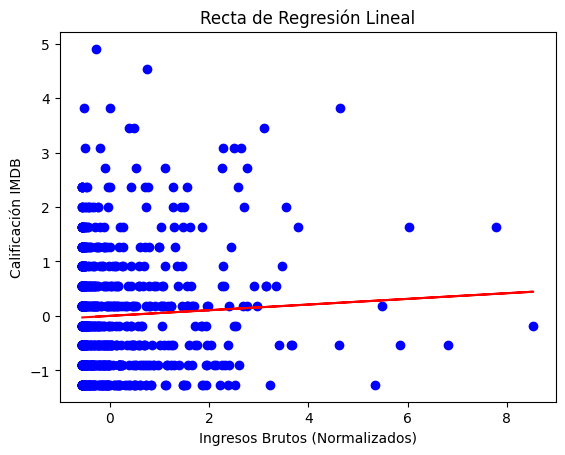

In [ ]:
# Definir los hiperparámetros
tasa_aprendizaje = 0.001
iteraciones = 1000

# Entrenar el modelo
W, b = descenso_gradiente(X, Y, W, b, tasa_aprendizaje, iteraciones)
print(f"W: {W}, b: {b}")

# Visualización de la Recta de Regresión
plt.scatter(X, Y, color='blue')
plt.plot(X, W * X + b, color='red')
plt.xlabel('Ingresos Brutos (Normalizados)')
plt.ylabel('Calificación IMDB')
plt.title('Recta de Regresión Lineal')
plt.show()

In [ ]:
# Definir la función para calcular el RMSE
def rmse(y_verdadero, y_predicho):
    return np.sqrt(np.mean((y_verdadero - y_predicho)**2))

# Calcular las predicciones
y_predicho = W * X + b

# Calcular el RMSE
error = rmse(Y, y_predicho)
print(f"RMSE del modelo: {error}")

RMSE del modelo: 0.9970611245712816


###Conclusión
El modelo de regresión lineal indica que hay una relación positiva, pero débil, entre los ingresos brutos y la calificación de IMDB.

##Interrogantes Resueltos

1.   **¿Qué directores tienden a generar mayores ingresos en taquilla?**

  Los directores que tienden a generar mayores ingresos en taquilla son Steven Spielberg, con $2,478,133,165, Anthony Russo, con $2,205,039,403, y Christopher Nolan, con $1,937,454,106. Estos directores han alcanzado cifras impresionantes gracias a sus exitosas producciones y la capacidad de atraer a un amplio público.

2.   **¿Qué actores están asociados con películas que generan mayores ingresos?**

  Los actores asociados con películas que generan mayores ingresos son Robert Downey Jr., con $3,129,073,242, Tom Hanks, con $2,903,564,984, y Chris Evans, con $2,339,664,431. Estos actores han participado en películas exitosas que han logrado generar grandes ingresos en taquilla, destacándose por su popularidad y el impacto de sus roles en éxitos cinematográficos.

1.   **¿Qué directores tienden a recibir más votos en IMDB?**

  Los directores que tienden a recibir más votos en IMDb son Christopher Nolan, con 11,578,345 votos, seguido por Quentin Tarantino con 8,123,208 votos, y Steven Spielberg con 7,917,166 votos. Christopher Nolan destaca claramente como el director con la mayor cantidad de votos, lo que refleja su amplia popularidad y el impacto significativo de sus películas en la audiencia.

2.   **¿Qué actores están asociados con películas que reciben más votos?**

  Los actores asociados con películas que reciben más votos en IMDb son Leonardo DiCaprio, con 10,782,195 votos, Tom Hanks, con 9,374,159 votos, y Brad Pitt, con 9,144,728 votos. Estos actores están vinculados a películas que han atraído una gran cantidad de participación del público, lo que refleja su popularidad y el impacto de sus actuaciones en la audiencia.

1.   **¿Qué géneros de películas son los que los actores prefieren?**

  Los géneros de películas que los actores prefieren son, principalmente, Drama con un 32.9%, seguido por Comedia con un 11.4%, y Crimen con un 10.0%. Estos géneros destacan por su popularidad y la frecuencia con la que los actores se involucran en ellos, reflejando una inclinación hacia roles dramáticos y narrativas emocionantes.

2.   **¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está obteniendo buenas calificaciones en IMDB la mayor parte del tiempo?**

  Las combinaciones de actores asociadas con las calificaciones más altas son:

  * Tim Robbins, Morgan Freeman, Bob Gunton y William Sadler con una calificación de 9.3.

  * Marlon Brando, Al Pacino, James Caan y Diane Keaton con una calificación de 9.2.
  
  * Henry Fonda, Lee J. Cobb, Martin Balsam y John Fiedler con una calificación de 9.0.

  Estas combinaciones destacan por recibir las calificaciones más altas, indicando que las películas en las que estos actores han trabajado juntos son altamente valoradas por la audiencia.

2.   **¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está obteniendo buenos ingresos en taquilla?**

  Las combinaciones de actores que están obteniendo los mayores ingresos en taquilla son:

  * Daisy Ridley, John Boyega, Oscar Isaac y Domhnall Gleeson con ingresos de $936,662,225.
  
  * Joe Russo, Robert Downey Jr., Chris Evans y Mark Ruffalo con ingresos de $858,373,000.

  * Sam Worthington, Zoe Saldana, Sigourney Weaver y Michelle Rodriguez con ingresos de $760,507,625.

  Estas combinaciones de actores destacan por generar los ingresos más altos en taquilla, indicando que las películas en las que estos actores han participado son particularmente exitosas a nivel comercial.



